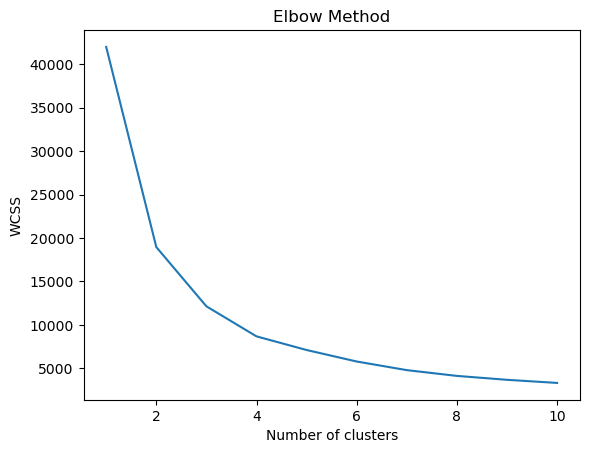

In [35]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Loading data
data = pd.read_csv('s&p500_price_data.csv')

# Fixing date column
data['Date'] = pd.to_datetime(data['Date']).astype('int64') // 10**9

# Normalising data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Determining number of clusters using elbow method
wcss = []  # within-cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, n_init=10)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

# Plotting the elbow method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [36]:
chosen_clusters = 4
kmeans = KMeans(n_clusters=chosen_clusters, init='k-means++', random_state=42, n_init=10)
clusters = kmeans.fit_predict(scaled_data)

# Adding cluster info to original data
data['Cluster'] = clusters

In [37]:
for i in range(chosen_clusters):
    print(f"Cluster {i}:")
    print(data[data['Cluster'] == i].head())  # Display first few rows of each cluster


Cluster 0:
           Date          A        AAL        AAP       AAPL        ABC   ABMD  \
705  1381968000  37.660946  21.000000  97.220001  18.017857  64.620003  20.42   
706  1382054400  37.904148  21.139999  98.699997  18.174643  64.610001  20.16   
707  1382313600  37.188843  21.219999  98.449997  18.620001  63.869999  20.33   
708  1382400000  36.494991  21.950001  98.720001  18.566786  63.759998  20.18   
709  1382486400  36.230328  21.400000  99.769997  18.748571  63.830002  20.59   

           ABT        ACN       ADBE  ...        WRB        WST         WU  \
705  37.169998  72.849998  52.070000  ...  29.453333  45.470001  18.309999   
706  37.290001  72.879997  52.630001  ...  29.600000  45.700001  18.660000   
707  36.860001  73.529999  53.080002  ...  29.540001  45.900002  18.930000   
708  37.020000  73.949997  53.169998  ...  29.113333  45.759998  19.139999   
709  37.230000  73.779999  53.060001  ...  29.226667  46.080002  19.250000   

            WY        WYNN    XEL

In [38]:
centroids = kmeans.cluster_centers_
print("Centroids:", centroids)


Centroids: [[0.43093231 0.3003616  0.68192172 ... 0.30738132 0.85252425 0.77892688]
 [0.91015493 0.683113   0.34193599 ... 0.70741026 0.51327797 0.74539727]
 [0.13685575 0.21737475 0.19045441 ... 0.23129934 0.81024198 0.55537346]
 [0.70599823 0.48281224 0.72780496 ... 0.51970588 0.76442395 0.76186544]]


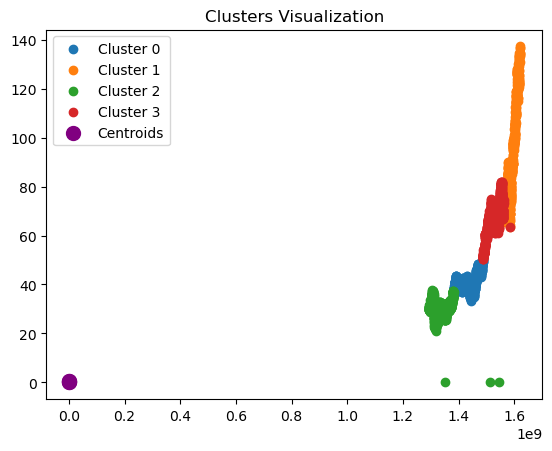

In [39]:
plt.scatter(data[data['Cluster'] == 0].iloc[:,0], data[data['Cluster'] == 0].iloc[:,1], label='Cluster 0')
plt.scatter(data[data['Cluster'] == 1].iloc[:,0], data[data['Cluster'] == 1].iloc[:,1], label='Cluster 1')
plt.scatter(data[data['Cluster'] == 2].iloc[:,0], data[data['Cluster'] == 2].iloc[:,1], label='Cluster 2')
plt.scatter(data[data['Cluster'] == 3].iloc[:,0], data[data['Cluster'] == 3].iloc[:,1], label='Cluster 3')
# Add more if more clusters
plt.scatter(centroids[:, 0], centroids[:, 1], s=100, c='purple', label='Centroids')
plt.legend()
plt.title('Clusters Visualization')
plt.show()


In [40]:
from sklearn.metrics import silhouette_score
score = silhouette_score(scaled_data, clusters)
print(f"Silhouette Score: {score}")


Silhouette Score: 0.4309336936694659
